# 120 Years of Olympics History
This analysis is done for the past 120 years of Olympic editions, to analyse on the effect of various factors on the performance of the athletes and NOC teams.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
athleteData = pd.read_csv('athlete_events.csv')
athleteData.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
print(athleteData.dtypes)
print("\nTotal number of data: ", len(athleteData))

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

Total number of data:  271116


### Athletes Profile

Number of Olympic Editions : 35

Year with the No. of Athletes


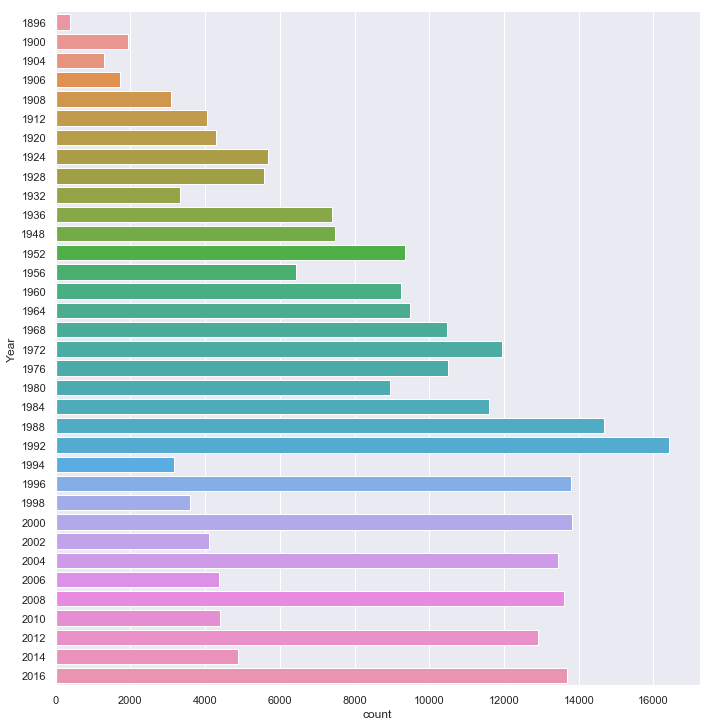

In [4]:
print("Number of Olympic Editions :", len(athleteData["Year"].unique()))
# print(athleteData["Year"].value_counts())
print("\nYear with the No. of Athletes")
sb.catplot(y = "Year", data = athleteData, kind = "count", height = 10)

In [5]:
Height_NaN = pd.DataFrame(athleteData['Height'])
Height = Height_NaN.dropna()
Height.describe().round(2)

,Height
count,210945.00
mean,175.34
std,10.52
min,127.00
25%,168.00
50%,175.00
75%,183.00
max,226.00


In [6]:
Weight_NaN = pd.DataFrame(athleteData['Weight'])
Weight = Weight_NaN.dropna()
Weight.describe().round(2)

,Weight
count,208241.00
mean,70.70
std,14.35
min,25.00
25%,60.00
50%,70.00
75%,79.00
max,214.00


In [7]:
Age_NaN = pd.DataFrame(athleteData['Age'])
Age = Age_NaN.dropna()
Age.describe().round(2)

,Age
count,261642.00
mean,25.56
std,6.39
min,10.00
25%,21.00
50%,24.00
75%,28.00
max,97.00


M    196594
F     74522
Name: Sex, dtype: int64


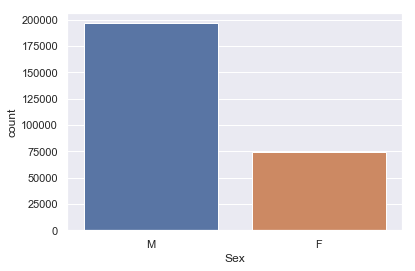

In [8]:
Sex_NaN = pd.DataFrame(athleteData['Sex'])
Sex = Sex_NaN.dropna()
print(athleteData['Sex'].value_counts())
sb.countplot(athleteData["Sex"])

### Team Profile

In [9]:
print("Number of NOCs :", len(athleteData["NOC"].unique()))
print("Number of Teams :", len(athleteData["Event"].unique()))

Number of NOCs : 230
Number of Teams : 765


In [10]:
# import re
# athleteData_clean = athleteData.copy()
# athleteData_clean["Team"] = athleteData_clean["Team"].apply(lambda x: re.sub(r'(A North American Team)',r'United States', x))

NOCnAthlete = pd.DataFrame(athleteData[['NOC', 'Name']])
NOCnAthlete_top = NOCnAthlete['NOC'].value_counts()
print("The top 10 number of athletes sent by NOCs")
NOCnAthlete_top.nlargest(10)

The top 10 number of athletes sent by NOCs


USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
CAN     9733
JPN     8444
SWE     8339
AUS     7638
HUN     6607
Name: NOC, dtype: int64

### Sport and Events Profile

In [11]:
print("Number of Events :", len(athleteData["Event"].unique()))
print("Number of Sports :", len(athleteData["Sport"].unique()))

Number of Events : 765
Number of Sports : 66


This could be the most popular sports in the history of Olympics

In [12]:
print(athleteData['Sport'].value_counts().nlargest(10))

Athletics               38624
Gymnastics              26707
Swimming                23195
Shooting                11448
Cycling                 10859
Fencing                 10735
Rowing                  10595
Cross Country Skiing     9133
Alpine Skiing            8829
Wrestling                7154
Name: Sport, dtype: int64


### The Olympic Editions

In [13]:
print("Number of Olympic Editions :", len(athleteData["Year"].unique()))
print("Number of Seasons :", len(athleteData["Season"].unique()))

Number of Olympic Editions : 35
Number of Seasons : 2


These are the cities that have hosted the Olympics since its inception.

In [14]:
print(athleteData['City'].value_counts())

London                    22426
Athina                    15556
Sydney                    13821
Atlanta                   13780
Rio de Janeiro            13688
Beijing                   13602
Barcelona                 12977
Los Angeles               12423
Seoul                     12037
Munich                    10304
Montreal                   8641
Mexico City                8588
Helsinki                   8270
Roma                       8119
Tokyo                      7702
Moskva                     7191
Paris                      7169
Berlin                     6506
Amsterdam                  4992
Sochi                      4891
Melbourne                  4829
Vancouver                  4402
Torino                     4382
Stockholm                  4338
Antwerpen                  4292
Salt Lake City             4109
Innsbruck                  3639
Nagano                     3605
Albertville                3436
Lillehammer                3160
Calgary                    2639
Sarajevo

### Medal Count

In [15]:
Medals = pd.DataFrame(athleteData['Medal'])
Medals_new = Medals.dropna()
print("The number of medals won: ", len(Medals_new))

The number of medals won:  39783


Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64


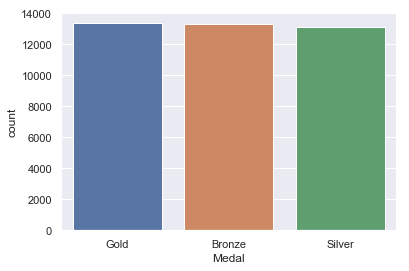

In [16]:
print(athleteData['Medal'].value_counts())
sb.countplot(Medals_new["Medal"])

1896     143
1994     331
1998     440
1906     458
2002     478
1904     486
2010     520
2006     526
2014     597
1900     604
1932     739
1928     823
1908     831
1912     941
1924     962
1948     987
1936    1025
1952    1033
1956    1043
1960    1058
1964    1215
1968    1256
1920    1308
1972    1414
1976    1531
1980    1602
1984    1698
1996    1842
1988    1845
2012    1941
2004    2001
2000    2004
2016    2023
1992    2030
2008    2048
Name: Year, dtype: int64

The number of medals won in each year.


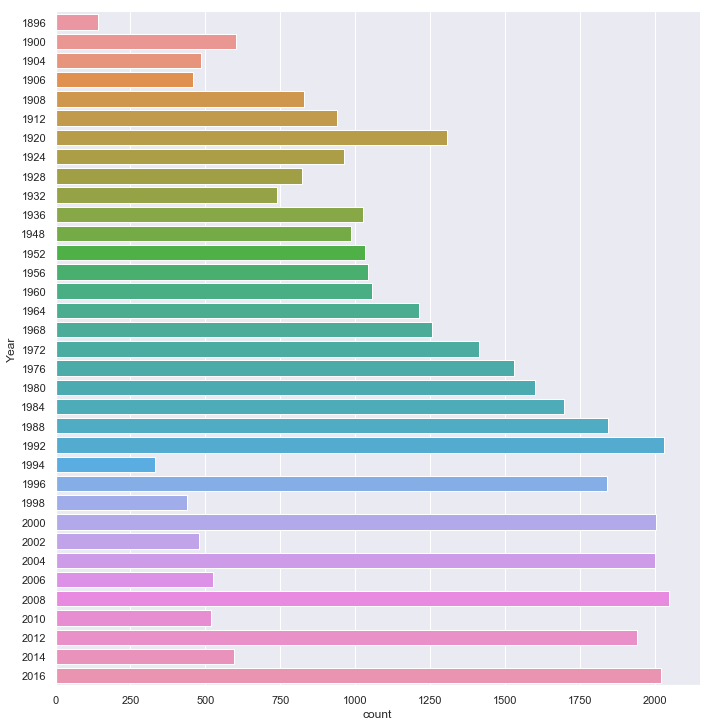

In [17]:
DF_SeasonNMedal_old = pd.DataFrame(athleteData[['Year', 'Medal']])
DF_SeasonNMedal = DF_SeasonNMedal_old.dropna()
print(DF_SeasonNMedal["Year"].value_counts(ascending = True))
print("\nThe number of medals won in each year.")
sb.catplot(y = "Year", data = DF_SeasonNMedal, kind = "count", height = 10)

### Analysis between Variables - Height, Weight and Medal Tally

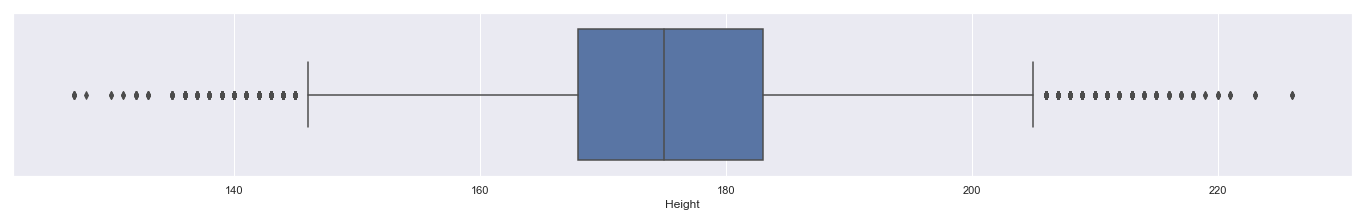

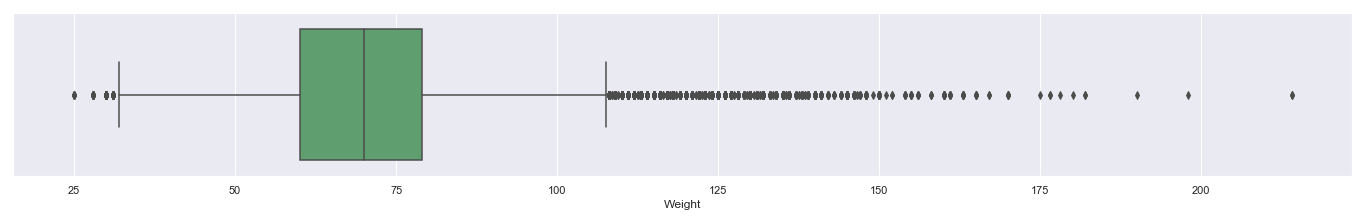

In [18]:
athlete_data_1 = pd.DataFrame(athleteData[['Weight', 'Height']])
f, axes = plt.subplots(1, 1, figsize=(24, 3))
sb.boxplot(athleteData['Height'], orient = "h")

f, axes = plt.subplots(1, 1, figsize=(24, 3))
sb.boxplot(athleteData['Weight'], orient = "h", color = 'g')

C:\Users\tkjie\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\tkjie\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\tkjie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


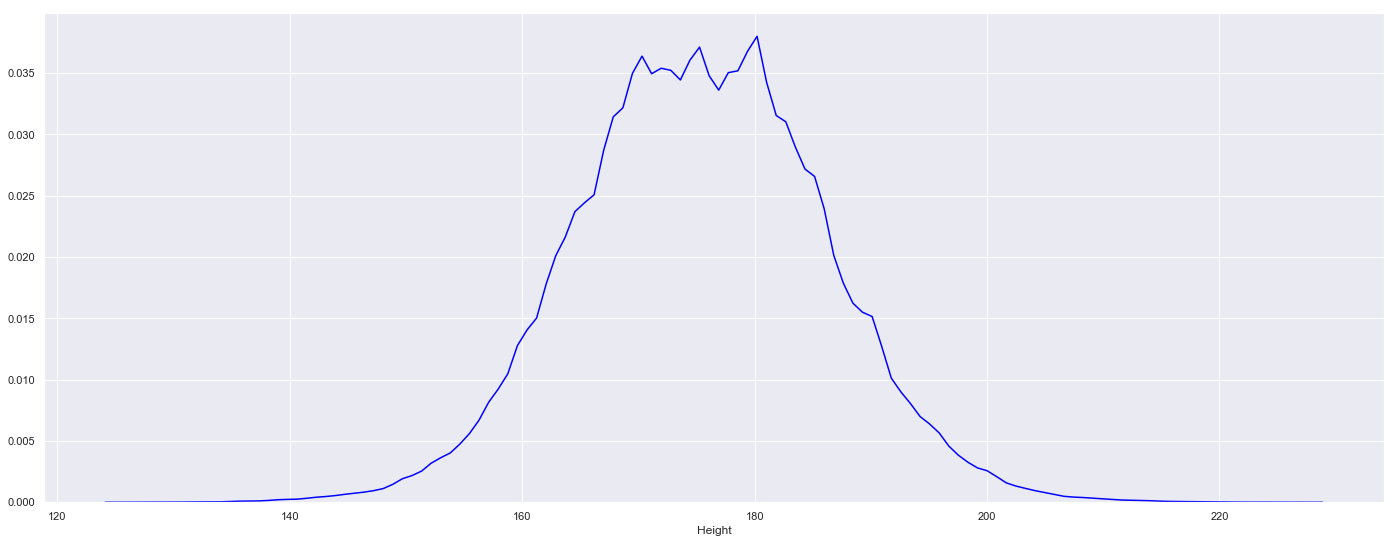

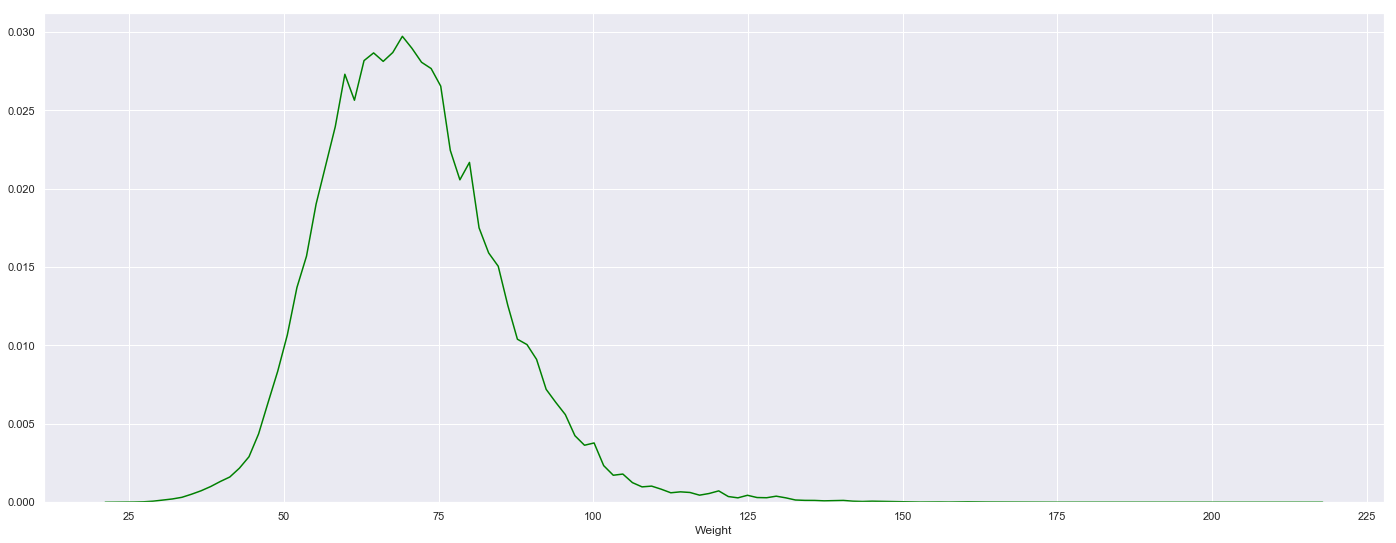

In [19]:
f, axes = plt.subplots(1, 1, figsize=(24, 9))
sb.distplot(athleteData['Height'], hist = False, color = "blue")

f, axes = plt.subplots(1, 1, figsize=(24, 9))
sb.distplot(athleteData['Weight'], hist = False, color = "green")

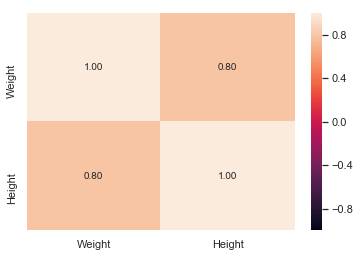

In [20]:
f, axes = plt.subplots(1,1 , figsize = (6,4))
sb.heatmap(athlete_data_1.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f')

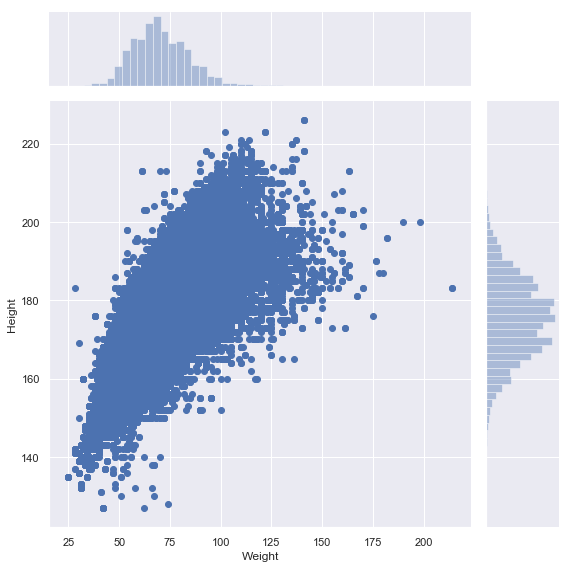

In [21]:
sb.jointplot(x = athleteData['Weight'], y = athleteData['Height'], height = 8)

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64


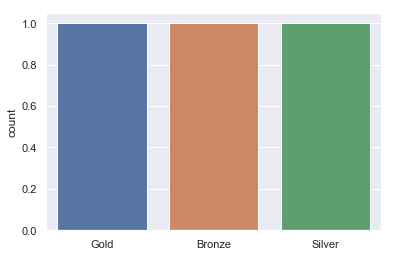

In [22]:
athlete_data_2 = pd.DataFrame(athleteData[['Weight', 'Medal']])
print(athlete_data_2["Medal"].value_counts())
sb.countplot(athlete_data_2["Medal"].value_counts().index)

In [23]:
Gold_Only_Weight = athlete_data_2[athlete_data_2["Medal"] == "Gold"]
Gold_Only_Weight = Gold_Only_Weight.dropna()
Gold_Only_Weight.describe().round(2)

,Weight
count,10254.00
mean,74.18
std,15.21
min,28.00
25%,63.00
50%,73.00
75%,84.00
max,170.00


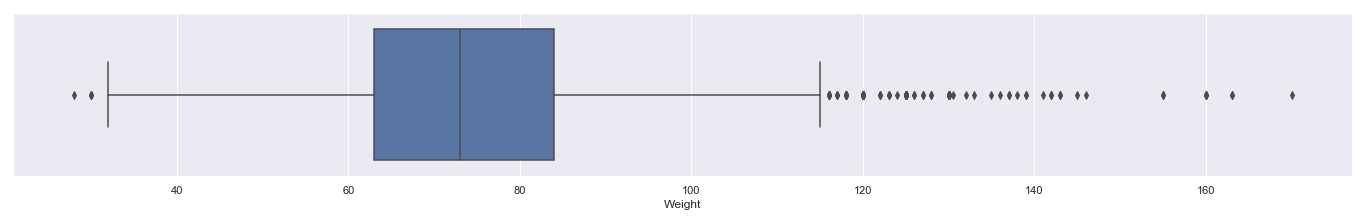

In [24]:
f, axes = plt.subplots(1, 1, figsize=(24, 3))
sb.boxplot(Gold_Only_Weight['Weight'], orient = "h")

In [25]:
athlete_data_3 = pd.DataFrame(athleteData[['Height', 'Medal']])
Gold_Only_Height = athlete_data_3[athlete_data_3["Medal"] == "Gold"]
Gold_Only_Height = Gold_Only_Height.dropna()
Gold_Only_Height.describe().round(2)

,Height
count,10539.00
mean,177.90
std,11.05
min,136.00
25%,170.00
50%,178.00
75%,185.00
max,223.00


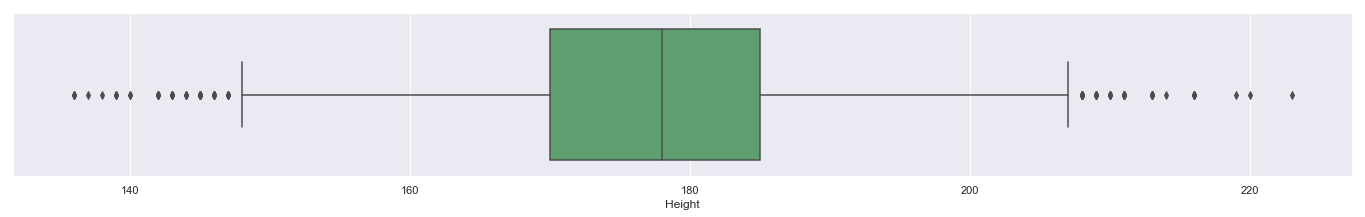

In [26]:
f, axes = plt.subplots(1, 1, figsize=(24, 3))
sb.boxplot(Gold_Only_Height['Height'], orient = "h", color = 'g')

### Analysis between Variables - Countries, Team and Medal Tally
Let's take an analysis of Team USA.

In [27]:
USA_athlete_data = athleteData[athleteData["NOC"] == "USA"]
USA_athlete_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN


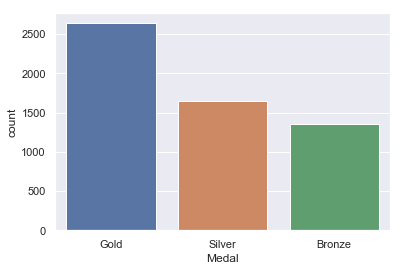

In [28]:
sb.countplot(USA_athlete_data["Medal"], order = USA_athlete_data["Medal"].value_counts().index)

American people are quite tall and heavy.

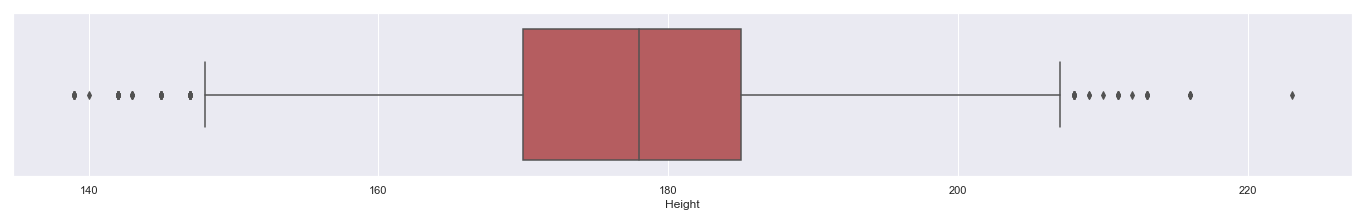

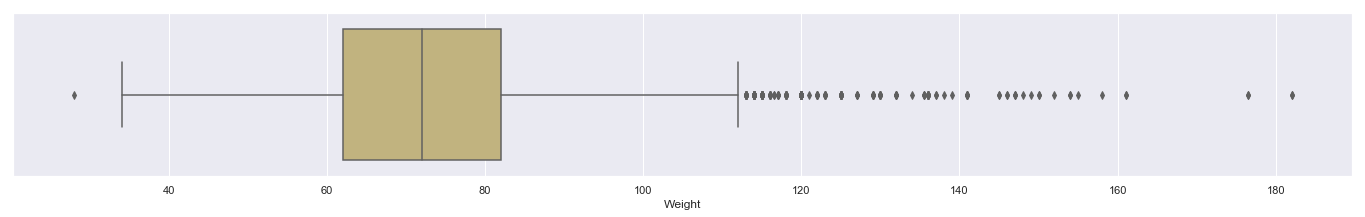

In [29]:
f, axes = plt.subplots(1, 1, figsize=(24, 3))
sb.boxplot(USA_athlete_data['Height'], orient = "h", color = 'r')

f, axes = plt.subplots(1, 1, figsize=(24, 3))
sb.boxplot(USA_athlete_data['Weight'], orient = "h", color = 'y')

In [30]:
print(USA_athlete_data['Sport'].value_counts().nlargest(10))

Athletics               3211
Gymnastics              2013
Swimming                1638
Rowing                   828
Fencing                  690
Shooting                 645
Speed Skating            570
Art Competitions         562
Alpine Skiing            552
Cross Country Skiing     538
Name: Sport, dtype: int64


Let's anaylse the statitics for Gymnastics in Team USA

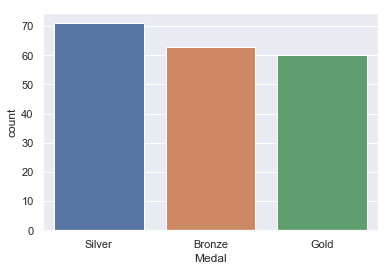

In [31]:
USA_athlete_data_Gym = USA_athlete_data[USA_athlete_data["Sport"] == "Gymnastics"]
sb.countplot(USA_athlete_data_Gym["Medal"], order = USA_athlete_data_Gym["Medal"].value_counts().index)

In [32]:
USA_athlete_data_Gym['Weight'].describe().round(2)

count    1150.00
mean       57.50
std        10.46
min        34.00
25%        49.00
50%        58.00
75%        65.00
max        77.00
Name: Weight, dtype: float64

In [33]:
USA_athlete_data_Gym['Medal'].fillna('None', inplace = True)
USA_athlete_data_Gym.head()

C:\Users\tkjie\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4986,2848,James Kanati Allen,M,21.0,173.0,64.0,United States,USA,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Men's Individual All-Around,None
4987,2848,James Kanati Allen,M,21.0,173.0,64.0,United States,USA,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Men's Team All-Around,None
4988,2848,James Kanati Allen,M,21.0,173.0,64.0,United States,USA,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Men's Floor Exercise,None
4989,2848,James Kanati Allen,M,21.0,173.0,64.0,United States,USA,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Men's Horse Vault,None
4990,2848,James Kanati Allen,M,21.0,173.0,64.0,United States,USA,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Men's Parallel Bars,None


Analysis specifically in the 2000 Olympics

In [34]:
USA_athlete_data_Gym_2000 = USA_athlete_data_Gym[USA_athlete_data_Gym["Year"] == 2000]
USA_athlete_data_Gym_2000.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
41092,21181,Amy Yuen-Yee Chow (-Ho),F,22.0,155.0,44.0,United States,USA,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Individual All-Around,None
41093,21181,Amy Yuen-Yee Chow (-Ho),F,22.0,155.0,44.0,United States,USA,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Bronze
41094,21181,Amy Yuen-Yee Chow (-Ho),F,22.0,155.0,44.0,United States,USA,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Floor Exercise,None
41095,21181,Amy Yuen-Yee Chow (-Ho),F,22.0,155.0,44.0,United States,USA,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Horse Vault,None
41096,21181,Amy Yuen-Yee Chow (-Ho),F,22.0,155.0,44.0,United States,USA,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Uneven Bars,None


In [35]:
print(USA_athlete_data_Gym_2000["Medal"].value_counts())

None      68
Bronze     6
Name: Medal, dtype: int64


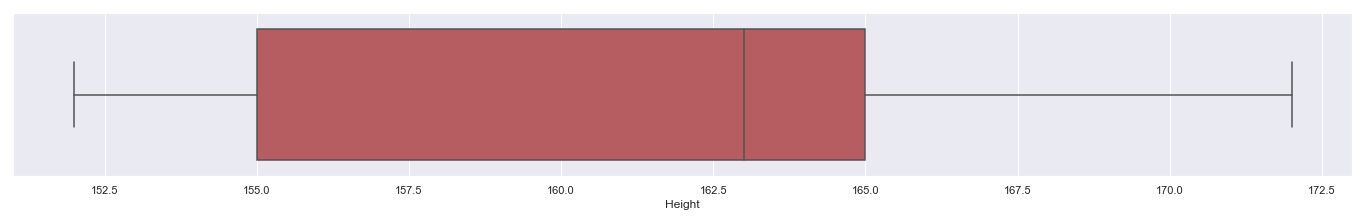

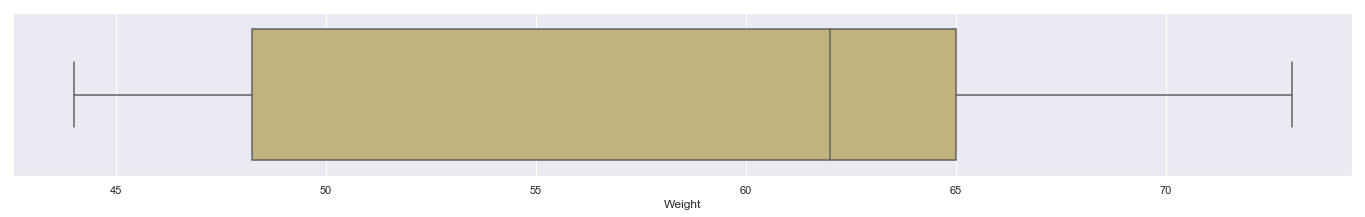

In [36]:
f, axes = plt.subplots(1, 1, figsize=(24, 3))
sb.boxplot(USA_athlete_data_Gym_2000['Height'], orient = "h", color = 'r')

f, axes = plt.subplots(1, 1, figsize=(24, 3))
sb.boxplot(USA_athlete_data_Gym_2000['Weight'], orient = "h", color = 'y')

In [37]:
USA_athlete_data_Gym_2000_Win = USA_athlete_data_Gym_2000[USA_athlete_data_Gym_2000["Medal"] != "None"]
USA_athlete_data_Gym_2000_Win_NoDupid = USA_athlete_data_Gym_2000_Win.drop_duplicates()
print(USA_athlete_data_Gym_2000_Win_NoDupid['Name'].value_counts())
USA_athlete_data_Gym_2000_Win_NoDupid

Mary Elise Ray                         1
Tasha Schwikert-Warren                 1
Jamie Annette Dantzscher               1
Dominique Margaux Dawes (-Thompson)    1
Amy Yuen-Yee Chow (-Ho)                1
Kristen Ann Maloney                    1
Name: Name, dtype: int64


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
41093,21181,Amy Yuen-Yee Chow (-Ho),F,22.0,155.0,44.0,United States,USA,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Bronze
49151,25312,Jamie Annette Dantzscher,F,18.0,152.0,49.0,United States,USA,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Bronze
50078,25774,Dominique Margaux Dawes (-Thompson),F,23.0,158.0,54.0,United States,USA,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Bronze
147833,74186,Kristen Ann Maloney,F,19.0,152.0,46.0,United States,USA,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Bronze
197674,99252,Mary Elise Ray,F,18.0,152.0,48.0,United States,USA,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Bronze
214995,107925,Tasha Schwikert-Warren,F,15.0,NaN,NaN,United States,USA,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Bronze


We have managed to find out some details from the Team USA who represented the US in the 2000 Sydney Olympics, in the category of Gymnastics. Next, let's find out further details from another sport. Let's say swimming in the 2008 Beijing Olympics for Team USA!

### Analysis for Team USA - Swimming in 2008 Beijing Olympics

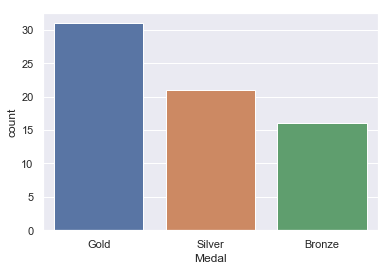

In [38]:
USA_athlete_data_Swim = USA_athlete_data[USA_athlete_data["Sport"] == "Swimming"]
USA_athlete_data_Swim_2008 = USA_athlete_data_Swim[USA_athlete_data_Swim["Year"] == 2008]
sb.countplot(USA_athlete_data_Swim_2008["Medal"], order = USA_athlete_data_Swim_2008["Medal"].value_counts().index)

In [39]:
USA_athlete_data_Swim_2008['Medal'].fillna('None', inplace = True)
USA_athlete_data_Swim_2008_win = USA_athlete_data_Swim_2008[USA_athlete_data_Swim_2008["Medal"] != "None"]
USA_athlete_data_Swim_2008_win_Gold = USA_athlete_data_Swim_2008_win[USA_athlete_data_Swim_2008_win["Medal"] == "Gold"]
USA_athlete_data_Swim_2008_win_Silver = USA_athlete_data_Swim_2008_win[USA_athlete_data_Swim_2008_win["Medal"] == "Silver"]
print("The top Gold medalist for Team USA:")
print(USA_athlete_data_Swim_2008_win_Gold['Name'].value_counts().nlargest(5))
print("\nThe top Silver medalist for Team USA:")
print(USA_athlete_data_Swim_2008_win_Silver['Name'].value_counts().nlargest(5))

The top Gold medalist for Team USA:
Michael Fred Phelps, II    8
Ryan Steven Lochte         2
Jason Edward Lezak         2
Garrett Weber-Gale         2
Aaron Wells Peirsol        2
Name: Name, dtype: int64

The top Silver medalist for Team USA:
Dara Grace Torres (-Hoffman, -Minas)    3
Kara Lynn Joyce                         2
Christine Marie Magnuson                2
Rebecca Soni                            2
Natalie Anne Coughlin (-Hall)           2
Name: Name, dtype: int64


Michael Phelps was the top Gold medalist for Team USA in Swimming during the 2008 Beijing Olympics.
Let's analyse their height and weight.

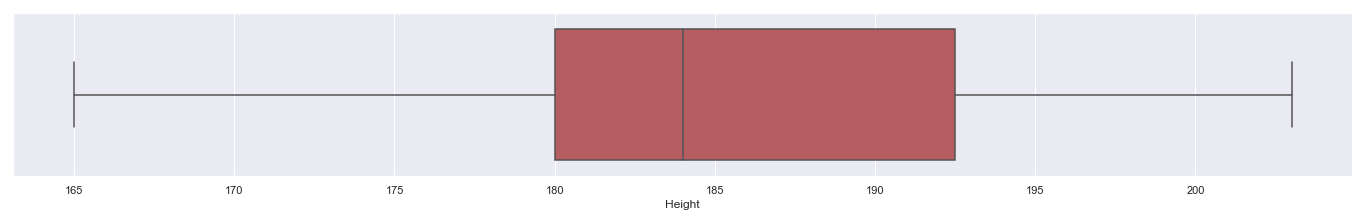

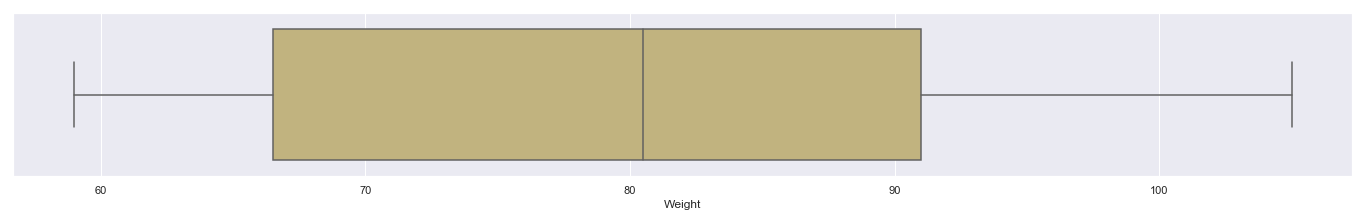

In [40]:
USA_athlete_data_Swim_2008_win_NoDupid = USA_athlete_data_Swim_2008_win.drop_duplicates(subset = 'Name')
f, axes = plt.subplots(1, 1, figsize=(24, 3))
sb.boxplot(USA_athlete_data_Swim_2008_win_NoDupid['Height'], orient = "h", color = 'r')

f, axes = plt.subplots(1, 1, figsize=(24, 3))
sb.boxplot(USA_athlete_data_Swim_2008_win_NoDupid['Weight'], orient = "h", color = 'y')